In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download peopledatalabssf/free-7-million-company-dataset

 98% 272M/278M [00:01<00:00, 177MB/s]
100% 278M/278M [00:01<00:00, 203MB/s]


In [ ]:
! unzip 'free-7-million-company-dataset'

Archive:  free-7-million-company-dataset.zip
  inflating: companies_sorted.csv    


In [ ]:
import pandas as pd
df = pd.read_csv('companies_sorted.csv')

In [ ]:
df.head(10)

,Unnamed: 0,name,domain,year founded,industry,size range,locality,country,linkedin url,current employee estimate,total employee estimate
0,5872184,ibm,ibm.com,1911.0,information technology and services,10001+,"new york, new york, united states",united states,linkedin.com/company/ibm,274047,716906
1,4425416,tata consultancy services,tcs.com,1968.0,information technology and services,10001+,"bombay, maharashtra, india",india,linkedin.com/company/tata-consultancy-services,190771,341369
2,21074,accenture,accenture.com,1989.0,information technology and services,10001+,"dublin, dublin, ireland",ireland,linkedin.com/company/accenture,190689,455768
3,2309813,us army,goarmy.com,1800.0,military,10001+,"alexandria, virginia, united states",united states,linkedin.com/company/us-army,162163,445958
4,1558607,ey,ey.com,1989.0,accounting,10001+,"london, greater london, united kingdom",united kingdom,linkedin.com/company/ernstandyoung,158363,428960
5,3844889,hewlett-packard,hpe.com,1939.0,information technology and services,10001+,"palo alto, california, united states",united states,linkedin.com/company/hewlett-packard-enterprise,127952,412952
6,2959148,cognizant technology solutions,cognizant.com,1994.0,information technology and services,10001+,"teaneck, new jersey, united states",united states,linkedin.com/company/cognizant,122031,210020
7,5944912,walmart,walmartcareers.com,1962.0,retail,10001+,"withee, wisconsin, united states",united states,linkedin.com/company/walmart,120753,272827
8,3727010,microsoft,microsoft.com,1975.0,computer software,10001+,"redmond, washington, united states",united states,linkedin.com/company/microsoft,116196,276983
9,3300741,at&t,att.com,1876.0,telecommunications,10001+,"dallas, texas, united states",united states,linkedin.com/company/at&t,115188,269659


In [ ]:
df.shape

(7173426, 11)

In [ ]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,Unnamed: 0,name,domain,year founded,industry,size range,locality,country,linkedin url,current employee estimate,total employee estimate


In [ ]:
df.columns

Index(['Unnamed: 0', 'name', 'domain', 'year founded', 'industry',
       'size range', 'locality', 'country', 'linkedin url',
       'current employee estimate', 'total employee estimate'],
      dtype='object')

In [ ]:
df[df['total employee estimate'] == df['total employee estimate'].max()]

,Unnamed: 0,name,domain,year founded,industry,size range,locality,country,linkedin url,current employee estimate,total employee estimate
0,5872184,ibm,ibm.com,1911.0,information technology and services,10001+,"new york, new york, united states",united states,linkedin.com/company/ibm,274047,716906


In [ ]:
df[df['current employee estimate'] == df['current employee estimate'].max()]

,Unnamed: 0,name,domain,year founded,industry,size range,locality,country,linkedin url,current employee estimate,total employee estimate
0,5872184,ibm,ibm.com,1911.0,information technology and services,10001+,"new york, new york, united states",united states,linkedin.com/company/ibm,274047,716906


In [ ]:
len(df['Unnamed: 0'].unique())

7173426

In [ ]:
df.shape[0]

7173426

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.columns

Index(['name', 'domain', 'year founded', 'industry', 'size range', 'locality',
       'country', 'linkedin url', 'current employee estimate',
       'total employee estimate'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7173426 entries, 0 to 7173425
Data columns (total 10 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   name                       object 
 1   domain                     object 
 2   year founded               float64
 3   industry                   object 
 4   size range                 object 
 5   locality                   object 
 6   country                    object 
 7   linkedin url               object 
 8   current employee estimate  int64  
 9   total employee estimate    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 547.3+ MB


In [ ]:
df[df['year founded'] == df['year founded'].min()]

,name,domain,year founded,industry,size range,locality,country,linkedin url,current employee estimate,total employee estimate
2191,university of glasgow,gla.ac.uk,1451.0,research,5001 - 10000,"glasgow, glasgow city, united kingdom",united kingdom,linkedin.com/company/university-of-glasgow,4005,10503


In [ ]:
industry_count = df['industry'].value_counts()
valids = industry_count[industry_count>150000]
valids

information technology and services    453044
marketing and advertising              338162
construction                           257921
management consulting                  194556
real estate                            193486
computer software                      191269
internet                               172208
financial services                     170880
Name: industry, dtype: int64

In [ ]:
#print(df[df['name'].str.contains('wipro')])
#print('wipro' in df['name'].unique())
df[df['name'] == 'wipro']

,name,domain,year founded,industry,size range,locality,country,linkedin url,current employee estimate,total employee estimate
9852,wipro,NaN,NaN,information technology and services,1001 - 5000,NaN,NaN,linkedin.com/company/wiproo,1133,1574


In [ ]:
df['name'].isnull().sum()

3

In [ ]:
df.dropna(subset=['name'], how='all', inplace=True)

In [ ]:
df['name'].isnull().sum()

0

In [ ]:
df['industry'].isnull().sum()

290003

In [ ]:
df.dropna(subset=['industry'], how='all', inplace=True)

In [ ]:
df['industry'].isnull().sum()

0

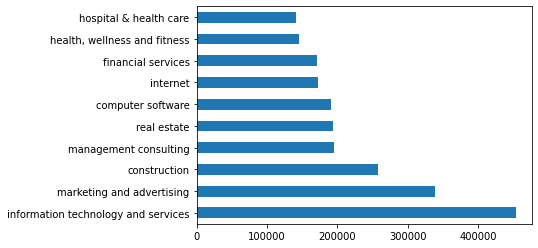

In [ ]:
df['industry'].value_counts()[:10].plot(kind='barh')

In [ ]:
#df.sort_values('year founded')
df.sort_values(by=["year founded"])[["name", "year founded"]][:10].reset_index(drop=True)

,name,year founded
0,university of glasgow,1451.0
1,hudson's bay company,1670.0
2,us naval reserve officer,1775.0
3,technology services organization (tso),1775.0
4,marine corps officer selection,1775.0
5,u.s. department of the treasury,1789.0
6,white house athletic center,1789.0
7,old farmer's almanac,1792.0
8,the times herald,1799.0
9,us army,1800.0


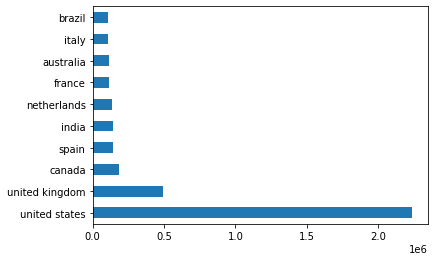

In [ ]:
df['country'].value_counts()[:10].plot(kind='barh')

In [ ]:
df.sort_values(by=["current employee estimate"], ascending=False)[["name", "current employee estimate"]][:10].reset_index(drop=True)

,name,current employee estimate
0,ibm,274047
1,tata consultancy services,190771
2,accenture,190689
3,us army,162163
4,ey,158363
5,hewlett-packard,127952
6,cognizant technology solutions,122031
7,walmart,120753
8,microsoft,116196
9,at&t,115188


In [ ]:
df.sort_values(by=["total employee estimate"], ascending=False)[["name", "total employee estimate"]][:10].reset_index(drop=True)

,name,total employee estimate
0,ibm,716906
1,accenture,455768
2,us army,445958
3,ey,428960
4,hewlett-packard,412952
5,pwc,379447
6,tata consultancy services,341369
7,deloitte,329145
8,us navy,325740
9,united states air force,316549


In [ ]:
#df['total employee estimate'] == 0
current_employees_nil = df[df['current employee estimate'] == 0].index
len(current_employees_nil)

1216506

In [ ]:
df.drop(current_employees_nil, inplace=True)
df.shape[0]

5666914

In [ ]:
df[df['year founded'] > 2021]

,name,domain,year founded,industry,size range,locality,country,linkedin url,current employee estimate,total employee estimate
478790,islamabad recruitment company(irco),irco.com.pk,2029.0,"health, wellness and fitness",51 - 200,"islamabad, islamabad, pakistan",pakistan,linkedin.com/company/islamabad-recruitment-com...,19,34
1000988,st. louis physical therapy,stlpt.com,2022.0,"health, wellness and fitness",11 - 50,"chesterfield, missouri, united states",united states,linkedin.com/company/st-louis-physical-therapy,8,38
1685181,nativalab,nativalab.com,2023.0,design,11 - 50,"milano, lombardy, italy",italy,linkedin.com/company/nativalab,4,9
1911596,royal knight ag,royalknightagriculture.com,2027.0,farming,1 - 10,"bensalem, pennsylvania, united states",united states,linkedin.com/company/royal-knight-ag,3,4
2802880,b.s.b. international career pvt. ltd,bsbinternational.org.uk,2025.0,human resources,1 - 10,"calcutta, west bengal, india",india,linkedin.com/company/b-s-b-international-caree...,2,2
2939095,creativwire inc.,creativwire.com,2103.0,internet,1 - 10,"new york, new york, united states",united states,linkedin.com/company/creativwire-inc-,2,3
3147954,stern corporation,sterncorp.jp,2022.0,mining & metals,1 - 10,"tokyo, tokyo, japan",japan,linkedin.com/company/stern-corporation,2,2
5636056,apollo management llc,apollomanagement.co,2025.0,management consulting,1 - 10,NaN,NaN,linkedin.com/company/apollo-management-llc,1,3


In [ ]:
df.drop(df.index[df['year founded'] > 2021], inplace=True)

In [ ]:
df['year founded'].isnull().sum()

2566825

In [ ]:
df['year founded'].value_counts().rename_axis('year founded').reset_index(name='count')

,year founded,count
0,2015.0,198009
1,2014.0,190695
2,2016.0,181548
3,2013.0,178651
4,2012.0,169267
...,...,...
222,1799.0,1
223,1800.0,1
224,1670.0,1
225,1451.0,1


In [ ]:
df['year founded'] = df['year founded'].fillna(0)

In [ ]:
df['year founded'].astype('int64')

0          1911
1          1968
2          1989
3          1800
4          1989
           ... 
5710863       0
5710864    2010
5710865    2017
5710866       0
5710867       0
Name: year founded, Length: 5666906, dtype: int64

In [ ]:
#15th century companies
df.query("1400 < `year founded` < 1500")['year founded'].value_counts().rename_axis('year founded').reset_index(name='count')

,year founded,count
0,1451.0,1


In [ ]:
#16th century companies
df.query("1500 < `year founded` < 1600")['year founded'].value_counts().rename_axis('year founded').reset_index(name='count')

,year founded,count


In [ ]:
#17th century companies
df.query("1600 < `year founded` < 1700")['year founded'].value_counts().rename_axis('year founded').reset_index(name='count')

,year founded,count
0,1670.0,1


In [ ]:
#18th century companies
df.query("1700 < `year founded` < 1800")['year founded'].value_counts().rename_axis('year founded').reset_index(name='count')

,year founded,count
0,1775.0,3
1,1789.0,2
2,1799.0,1


In [ ]:
#19th century companies
df.query("1800 < `year founded` < 1900")['year founded'].value_counts().rename_axis('year founded').reset_index(name='count')

,year founded,count
0,1898.0,965
1,1890.0,856
2,1896.0,839
3,1895.0,762
4,1889.0,757
...,...,...
94,1813.0,42
95,1802.0,42
96,1807.0,41
97,1809.0,41


In [ ]:
#20th century companies
df.query("1900 < `year founded` < 2000")['year founded'].value_counts().rename_axis('year founded').reset_index(name='count')

,year founded,count
0,1999.0,52651
1,1998.0,45414
2,1997.0,41521
3,1996.0,40668
4,1995.0,37739
...,...,...
94,1909.0,965
95,1903.0,933
96,1915.0,922
97,1902.0,914


In [ ]:
#21st century companies
df.query("2000 < `year founded` < 2100")['year founded'].value_counts().rename_axis('year founded').reset_index(name='count')

,year founded,count
0,2015.0,198009
1,2014.0,190695
2,2016.0,181548
3,2013.0,178651
4,2012.0,169267
5,2010.0,166138
6,2011.0,150436
7,2009.0,141517
8,2017.0,134044
9,2008.0,114440


In [ ]:
#len(df['country'].value_counts())
df['country'].value_counts()[210:]

são tomé and príncipe        12
northern mariana islands     12
timor-leste                  12
chad                         11
antigua and barbuda          10
grenada                      10
svalbard and jan mayen       10
palau                         7
sint maarten                  6
comoros                       6
tonga                         6
saint martin                  5
micronesia                    5
american samoa                5
north korea                   5
republic of the congo         4
central african republic      4
montserrat                    3
western sahara                3
eritrea                       2
saint helena                  1
niue                          1
u.s. virgin islands           1
norfolk island                1
saint pierre and miquelon     1
saint barthélemy              1
Name: country, dtype: int64

In [ ]:
percentage_of_companies_with_employees_below_50 = (len(df[df['total employee estimate'] < 50])/df.shape[0]) * 100
percentage_of_companies_with_employees_below_50

92.0651939523966

In [ ]:
percentage_of_companies_with_employees_below_5 = (len(df[df['total employee estimate'] < 5])/df.shape[0]) * 100
percentage_of_companies_with_employees_below_5

58.50024687192623

In [ ]:
india_df = df[df['country'] == 'india']

In [ ]:
india_df['name'][80:100]

2575                 cms infosystems pvt. ltd.
2611                           abc consultants
2627                                    biocon
2656                              zydus cadila
2665                           reliance retail
2725                                    eclerx
2760               sbi life insurance co. ltd.
2792    indian institute of technology, bombay
2856            ola (ani technologies pvt ltd)
2884                                       jio
2979        shriram transport finance co. ltd.
2983                             icici lombard
3012                          aurobindo pharma
3060                          amity university
3070          indigo (interglobe aviation ltd)
3071                              asian paints
3107                  siemens technology india
3128                   hyundai motor india ltd
3189                 jindal steel & power ltd.
3198                                   ranbaxy
Name: name, dtype: object

In [ ]:
result_india = india_df['year founded'].value_counts().rename_axis('year founded').reset_index(name='count')
result_india = result_india.tail(result_india.shape[0]-1)

In [ ]:
result_india['year founded'] = result_india['year founded'].astype('int64')

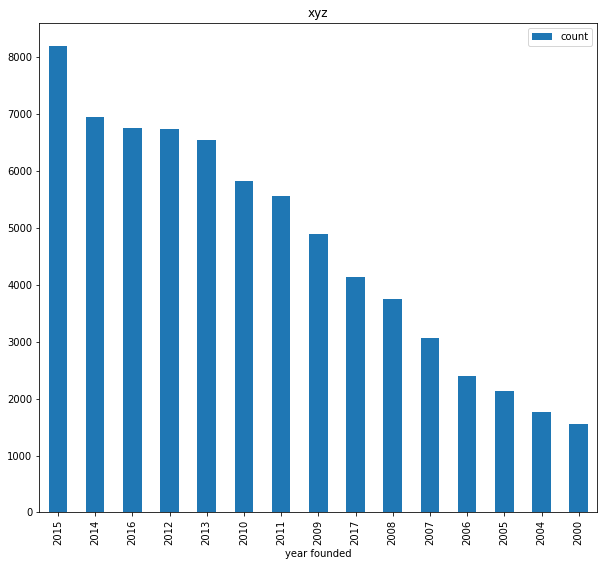

In [ ]:
result_india[:15].plot(x="year founded", y="count", kind="bar", figsize=(10, 9), title="xyz")

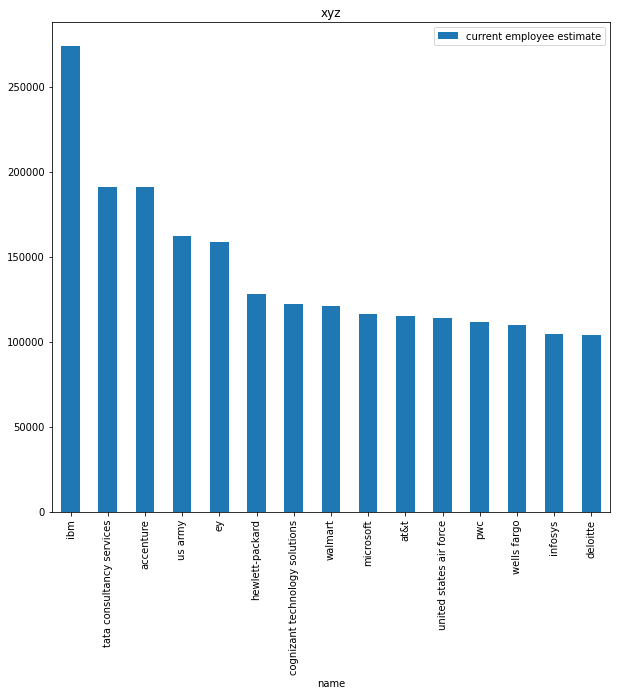

In [ ]:
df[:15].plot(x="name", y="current employee estimate", kind="bar", figsize=(10, 9), title="xyz")